In [52]:
from collections import Counter

import pandas as pd
import plotly.express as px
from Bio import Entrez, SeqIO

Entrez.api_key = ""
Entrez.email = ""
term = 'TMPRSS6[GENE] AND "refseq select"[filter] AND human[organism]'
handle = Entrez.esearch(db="protein", term=term)
record = Entrez.read(handle)
idlist = record['IdList']
handle = Entrez.efetch(db='protein', id=",".join(
    idlist), retmode='text', rettype='gp')
record = SeqIO.read(handle, 'genbank')
seq = record.seq
df = pd.DataFrame.from_dict(Counter(seq), orient='index', columns=['count'])
print(df)


   count
M     10
P     46
V     70
A     53
E     44
Q     41
G     69
D     40
F     25
K     27
C     38
S     62
R     48
Y     32
L     88
W     19
N     17
H     17
T     32
I     24


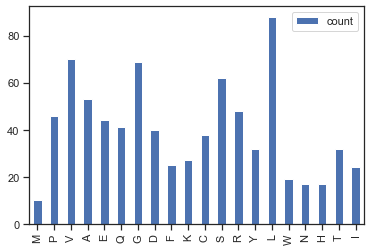

In [53]:
plot = df.plot.bar(y='count')


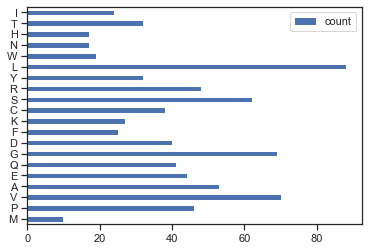

In [54]:
plot = df.plot.barh(y='count')


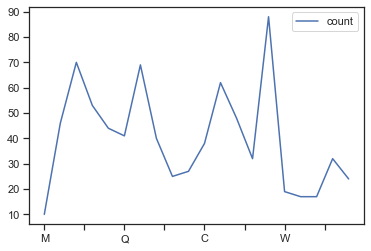

In [55]:
plot = df.plot.line(y='count')


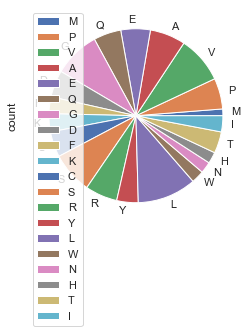

In [56]:
plot = df.plot.pie(y='count')


In [57]:
fig = px.pie(df, values='count', names=df.index)
fig.show()


In [58]:
fig = px.bar(df, y='count')
fig.show()


In [59]:
fig = px.scatter(df, y='count')
fig.show()


In [60]:
fig = px.line(df, y='count')
fig.show()
